<center><img src="img/skillfactorylogo.png"></center>

<h1><center>Курс "Практический Machine Learning"</center></h1>
<h3><center></center></h3>
<hr>
<h2><center>Самостоятельная работа</center></h2>
<h2><center>выполнил Александр Халипов</center></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
train = pd.read_csv('data/train.csv', index_col='_id')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24712 entries, df7489733b004bbe40d3d37b34f82419 to 46d0d25dfd1def79632dd437261d0b5c
Data columns (total 21 columns):
age               24712 non-null int64
job               24712 non-null object
marital           24712 non-null object
education         24712 non-null object
default           24712 non-null object
housing           24712 non-null object
loan              24712 non-null object
contact           24712 non-null object
month             24712 non-null object
day_of_week       24712 non-null object
duration          24712 non-null int64
campaign          24712 non-null int64
pdays             24712 non-null int64
previous          24712 non-null int64
poutcome          24712 non-null object
emp.var.rate      24712 non-null float64
cons.price.idx    24712 non-null float64
cons.conf.idx     24712 non-null float64
euribor3m         24712 non-null float64
nr.employed       24712 non-null float64
target            24712 non-null int64

В обучающей выборке нет пропусков. Предлагается поправить переменную **duration** по той причине, что длительность последнего звонка в 0 сек, скорее всего, означает или что не дозвонились и тогда надо сохранять предыдущую длитильность, или что звонков не было вовсе. В обоих случаях эти значения не могут быть показательны, поэтому строчки с ними удаляются.

In [4]:
train1 = train[train['duration'] != 0]

In [5]:
len(train1)

24708

Убрано 4-е строки.

Дальше для определения значимых переменных предлагается воспользоваться деревом решений (**DecisionTreeClassifier**), его простотой в работе с категориальными признаками (отсутствие потребности в стандартизации или нормализации переменных).

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

Переводим категориальные переменные в числовые.

In [7]:
categorical_columns = train1.columns[train1.dtypes == 'object']
for column in categorical_columns:
    train1[column] = label_encoder.fit_transform(train1[column])

C:\Users\KhalipovAY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24708 entries, df7489733b004bbe40d3d37b34f82419 to 46d0d25dfd1def79632dd437261d0b5c
Data columns (total 21 columns):
age               24708 non-null int64
job               24708 non-null int64
marital           24708 non-null int64
education         24708 non-null int64
default           24708 non-null int64
housing           24708 non-null int64
loan              24708 non-null int64
contact           24708 non-null int64
month             24708 non-null int64
day_of_week       24708 non-null int64
duration          24708 non-null int64
campaign          24708 non-null int64
pdays             24708 non-null int64
previous          24708 non-null int64
poutcome          24708 non-null int64
emp.var.rate      24708 non-null float64
cons.price.idx    24708 non-null float64
cons.conf.idx     24708 non-null float64
euribor3m         24708 non-null float64
nr.employed       24708 non-null float64
target            24708 non-null int64
dtypes: f

### Дальше осуществляем автоматический выбор гиперпараметров.

In [9]:
X, y = train1.iloc[:, :-1].values, train1.iloc[:, -1].values

In [10]:
from scipy.stats import randint as randint

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [11]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(2, 8),
    'min_samples_leaf': randint(5, 10),
    'class_weight': [None, 'balanced']}

cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

model = DecisionTreeClassifier(random_state=123)
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=200, n_jobs=-1,
                                   cv=cv, scoring='roc_auc', random_state=123)

random_search.fit(X, y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
          error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best'),
          fit_params=None, iid=True, n_iter=200, n_jobs=-1,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A44390FEF0>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A443916080>, 'class_weight': [None, 'balanced']},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [12]:
random_search.best_score_

0.934830345876329

In [13]:
best_model = random_search.best_estimator_

In [14]:
best_model

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=6, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

### Определяем значимость переменных

In [15]:
imp = best_model.feature_importances_
pd.Series(index=train.columns[:-1], data=imp)

age               0.000271
job               0.000084
marital           0.000245
education         0.001629
default           0.004069
housing           0.000000
loan              0.000000
contact           0.002092
month             0.020979
day_of_week       0.002823
duration          0.511136
campaign          0.001229
pdays             0.008222
previous          0.001541
poutcome          0.002308
emp.var.rate      0.050284
cons.price.idx    0.004139
cons.conf.idx     0.084642
euribor3m         0.031854
nr.employed       0.272455
dtype: float64

Предлагается из дата-сета удалить следующие столбцы: **loan**, **housing**, **job**, как малозначимые.

### Обработка дата сета

In [16]:
def preproc_data(df_input):
    
    df_output = df_input.copy()
    df_output = df_output.drop(['job', 'housing', 'loan'], axis=1)
    df_output = df_output[df_output['duration'] != 0]
    df_output['marital'] = df_output['marital'].map({'unknown': 0, 'single': 1, 'married': 2, 'divorced': 3})
    df_output['education'] = df_output['education'].map({'unknown': 0, 'illiterate': 1, 'basic.4y': 2, 'basic.6y': 3, 'basic.9y': 4, 'professional.course': 5, 'high.school': 6, 'university.degree': 7})
    df_output['default'] = df_output['default'].map({'unknown': 0, 'no': 1, 'yes': 2})
    df_output = pd.get_dummies(df_output, columns=['contact'])
    df_output['month'] = df_output['month'].map({'jаn': 0, 'feb': 1, 'mar': 2, 'apr': 3, 'may': 4, 'jun': 5, 'jul': 6, 'aug': 7, 'sep': 8, 'oct': 9, 'nov': 10, 'dec': 11})
    df_output['day_of_week'] = df_output['day_of_week'].map({'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4})
    df_output['poutcome'] = df_output['poutcome'].map({'failure': 0, 'nonexistent': 1, 'success': 2})
    
    return df_output
    


In [17]:
df_preproc = train.pipe(preproc_data)

In [18]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24708 entries, df7489733b004bbe40d3d37b34f82419 to 46d0d25dfd1def79632dd437261d0b5c
Data columns (total 19 columns):
age                  24708 non-null int64
marital              24708 non-null int64
education            24708 non-null int64
default              24708 non-null int64
month                24708 non-null int64
day_of_week          24708 non-null int64
duration             24708 non-null int64
campaign             24708 non-null int64
pdays                24708 non-null int64
previous             24708 non-null int64
poutcome             24708 non-null int64
emp.var.rate         24708 non-null float64
cons.price.idx       24708 non-null float64
cons.conf.idx        24708 non-null float64
euribor3m            24708 non-null float64
nr.employed          24708 non-null float64
target               24708 non-null int64
contact_cellular     24708 non-null uint8
contact_telephone    24708 non-null uint8
dtypes: float64(5), int64(12),

In [19]:
X_train, y_train = df_preproc.drop(['target'], axis=1).values, df_preproc['target'].values

Тестовый дата-сет

In [20]:
test = pd.read_csv('data/test.csv', index_col='_id')

In [21]:
sample_test = pd.read_csv('data/sample_submission.csv', index_col='_id') #Нет позитивных исходов (можно, например, не мержить)

In [22]:
test = pd.merge(test, sample_test, left_on='_id', right_on='_id')

In [23]:
df_test = test.pipe(preproc_data)

In [24]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16476 entries, 66810d8e6bf2b41c880a7bc6c8a1e295 to 82db4c5dd22e8182b30917571fe77c4d
Data columns (total 19 columns):
age                  16476 non-null int64
marital              16476 non-null int64
education            16476 non-null int64
default              16476 non-null int64
month                16476 non-null int64
day_of_week          16476 non-null int64
duration             16476 non-null int64
campaign             16476 non-null int64
pdays                16476 non-null int64
previous             16476 non-null int64
poutcome             16476 non-null int64
emp.var.rate         16476 non-null float64
cons.price.idx       16476 non-null float64
cons.conf.idx        16476 non-null float64
euribor3m            16476 non-null float64
nr.employed          16476 non-null float64
target               16476 non-null int64
contact_cellular     16476 non-null uint8
contact_telephone    16476 non-null uint8
dtypes: float64(5), int64(12),

In [25]:
X_test, y_test = df_test.drop(['target'], axis=1).values, df_test['target'].values

## Метод ближайших соседей

In [26]:
from scipy.stats import randint as randint

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

In [27]:
pipe_knn = Pipeline([('scl', StandardScaler()),
                    ('knn', KNeighborsClassifier())])
param_grid_knn = {
    'knn__n_neighbors': randint(52, 58),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]}

cv_knn = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

rs_knn = RandomizedSearchCV(estimator=pipe_knn, param_distributions=param_grid_knn, n_iter=25, n_jobs=-1, cv=cv_knn, scoring='roc_auc', random_state=123)

rs_knn.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
          error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
          fit_params=None, iid=True, n_iter=25, n_jobs=-1,
          param_distributions={'knn__n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A445D71E80>, 'knn__weights': ['uniform', 'distance'], 'knn__p': [1, 2]},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [28]:
best_model_knn = rs_knn.best_estimator_.steps[1][1]

In [29]:
best_model_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=53, p=1,
           weights='distance')

In [30]:
rs_knn.best_score_

0.9279986954855137

In [31]:
best_pipe_knn = rs_knn.best_estimator_

In [32]:
y_hat_knn = best_pipe_knn.predict(X_test)

In [33]:
sample_test_knn = pd.Series(index=df_test.index, data=y_hat_knn)

In [34]:
y_hat_proba_knn = best_pipe_knn.predict_proba(X_test) 

In [35]:
sample_test_proba_knn = pd.DataFrame(index=df_test.index, data=y_hat_proba_knn) #Ответ для отправки в конкурсе

In [80]:
sample_test_proba_knn.to_csv('data/sample_knn.csv')

### Для тестовой выборки посчитать ROC_AUC нельзя, потому что в ней нет положительных исходов, поэтому предлагается посчитать показатель с использованием объединенной выборки (тестовой + обучающей)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [37]:
y_auc_knn = np.concatenate((y_train, y_test))

In [38]:
X_auc_knn = np.concatenate((X_train, X_test))

In [39]:
#Выбирем тестовую выборку на основе перемешивания тестовой и обучающей

_, X_test1, _, y_test1 = train_test_split(X_auc_knn, y_auc_knn, test_size=16476./41184., shuffle=True, random_state=123)

In [40]:
y_proba_knn = best_pipe_knn.predict_proba(X_test1) 

In [41]:
y_train_knn = best_pipe_knn.predict(X_test1)

In [42]:
roc_auc_score(y_test1, y_proba_knn[:, 1])

1.0

## Метод деревьев решений

In [43]:
from scipy.stats import randint as randint

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

In [44]:
pipe_dtc = Pipeline([('scl', StandardScaler()),
                    ('dtc', DecisionTreeClassifier())])
param_grid_dtc = {
    'dtc__criterion': ['gini', 'entropy'],
    'dtc__max_depth': randint(2, 8),
    'dtc__min_samples_leaf': randint(5, 12),
    'dtc__class_weight': [None, 'balanced']}

cv_dtc = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

rs_dtc = RandomizedSearchCV(estimator=pipe_dtc, param_distributions=param_grid_dtc, n_iter=200, n_jobs=-1, cv=cv_dtc, scoring='roc_auc', random_state=123)

rs_dtc.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
          error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('dtc', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))]),
          fit_params=None, iid=True, n_iter=200, n_jobs=-1,
          param_distributions={'dtc__criterion': ['gini', 'entropy'], 'dtc__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A445D6F160>, 'dtc__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A445D6FB00>, 'dtc__class_weight': [None, 'balanced']},
          pre_dispatch='2*n_jobs', r

In [45]:
best_model_dtc = rs_dtc.best_estimator_.steps[1][1]

In [46]:
best_model_dtc

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=5, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
rs_dtc.best_score_

0.9351774259123478

In [48]:
best_pipe_dtc = rs_dtc.best_estimator_

In [49]:
y_hat_dtc = best_pipe_dtc.predict(X_test)

In [50]:
sample_test_dtc = pd.Series(index=df_test.index, data=y_hat_dtc)

In [51]:
y_hat_proba_dtc = best_pipe_dtc.predict_proba(X_test) 

In [81]:
sample_test_proba_dtc = pd.DataFrame(index=df_test.index, data=y_hat_proba_dtc) #Ответ для отправки в конкурсе

In [82]:
sample_test_proba_dtc.to_csv('data/sample_dtc.csv')

### Для тестовой выборки посчитать ROC_AUC нельзя, потому что в ней нет положительных исходов, поэтому предлагается посчитать показатель с использованием объединенной выборки (тестовой + обучающей)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [54]:
y_auc_dtc = np.concatenate((y_train, y_test))

In [55]:
X_auc_dtc = np.concatenate((X_train, X_test))

In [56]:
#Выбирем тестовую выборку на основе перемешивания тестовой и обучающей

_, X_test2, _, y_test2 = train_test_split(X_auc_dtc, y_auc_dtc, test_size=16476./41184., shuffle=True, random_state=123)

In [57]:
y_proba_dtc = best_pipe_dtc.predict_proba(X_test2) 

In [58]:
y_train_dtc = best_pipe_dtc.predict(X_test2)

In [59]:
roc_auc_score(y_test2, y_proba_dtc[:, 1])

0.9204503098900729

## Логистическая регрессия

In [60]:
from scipy.stats import randint as randint
from scipy.stats import uniform

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

In [61]:
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('lr', LogisticRegression())])
param_grid_lr = {
    'lr__C': uniform(2000, 200),
    'lr__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

cv_lr = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

rs_lr = RandomizedSearchCV(estimator=pipe_lr, param_distributions=param_grid_lr, n_iter=200, n_jobs=-1, cv=cv_dtc, scoring='roc_auc', random_state=123)

rs_lr.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
          error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
          fit_params=None, iid=True, n_iter=200, n_jobs=-1,
          param_distributions={'lr__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A445C78CF8>, 'lr__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [62]:
best_model_lr = rs_lr.best_estimator_.steps[1][1]

In [63]:
best_model_lr

LogisticRegression(C=2068.691202809665, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

In [64]:
rs_lr.best_score_

0.9249902685027724

Как видно ниже из рисунка последующее изменение параметра **С** не сильно влияет на качество оценки. ROC_AUC колеблится в районе 0,92

In [65]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (18,12)

In [66]:
model_lr = LogisticRegression(random_state=123)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=132)

train_scores, valid_scores = validation_curve(model_lr, X_train, y_train, 
                                              'C', np.arange(0.01, 1000000000000000.01, 10000000000000),
                                              cv=cv, scoring='roc_auc')

Text(0,0.5,'ROC AUC')

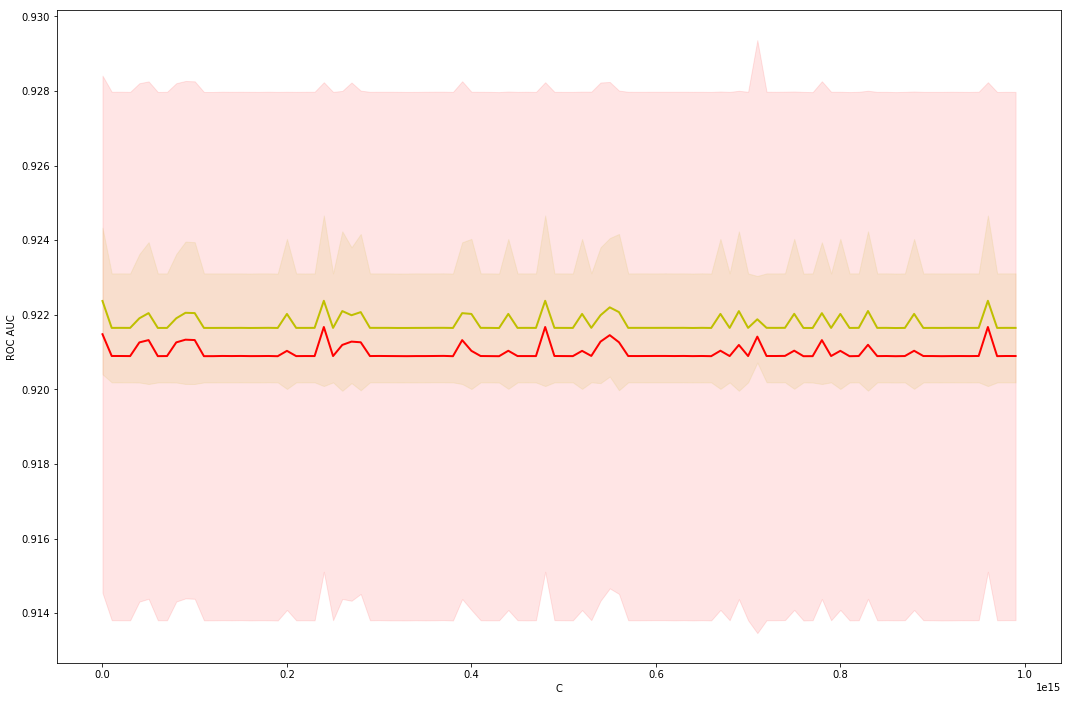

In [67]:
train_score_mean = train_scores.mean(axis=1)
train_score_std = train_scores.std(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)
valid_scores_std = valid_scores.std(axis=1)

plt.fill_between(np.arange(0.01, 1000000000000000.01, 10000000000000), train_score_mean-train_score_std, train_score_mean+train_score_std, color='y',
                 interpolate=False, alpha=0.1)
plt.fill_between(np.arange(0.01, 1000000000000000.01, 10000000000000), valid_scores_mean-valid_scores_std, valid_scores_mean+valid_scores_std, color='r', 
                 interpolate=False, alpha=0.1)

plt.plot(np.arange(0.01, 1000000000000000.01, 10000000000000), train_score_mean, c='y', lw=2)
plt.plot(np.arange(0.01, 1000000000000000.01, 10000000000000), valid_scores_mean, c='r', lw=2)

plt.xlabel('C')
plt.ylabel('ROC AUC')

In [68]:
best_pipe_lr = rs_lr.best_estimator_

In [69]:
y_hat_lr = best_pipe_lr.predict(X_test)

In [70]:
sample_test_lr = pd.Series(index=df_test.index, data=y_hat_lr)

In [71]:
y_hat_proba_lr = best_pipe_lr.predict_proba(X_test) 

In [72]:
sample_test_proba_lr = pd.DataFrame(index=df_test.index, data=y_hat_proba_lr) #Ответ для отправки в конкурсе

In [83]:
sample_test_proba_lr.to_csv('data/sample_lr.csv')

### Для тестовой выборки посчитать ROC_AUC нельзя, потому что в ней нет положительных исходов, поэтому предлагается посчитать показатель с использованием объединенной выборки (тестовой + обучающей)

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [74]:
y_auc_lr = np.concatenate((y_train, y_test))

In [75]:
X_auc_lr = np.concatenate((X_train, X_test))

In [76]:
#Выбирем тестовую выборку на основе перемешивания тестовой и обучающей

_, X_test3, _, y_test3 = train_test_split(X_auc_lr, y_auc_lr, test_size=16476./41184., shuffle=True, random_state=123)

In [77]:
y_proba_lr = best_pipe_lr.predict_proba(X_test3) 

In [78]:
y_train_lr = best_pipe_lr.predict(X_test3)

In [79]:
roc_auc_score(y_test3, y_proba_lr[:, 1])

0.9054234157584113